In [30]:
import requests
import secrets
import time
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt

In [11]:
# Bringing in API-KEY
load_dotenv('./.env')      
key = os.getenv("API_KEY")


In [117]:
list_of_files = ['arkham_txns.csv','arkham_txns (10).csv','arkham_txns (9).csv']#,'arkham_txns (1).csv','arkham_txns (2).csv','arkham_txns (3).csv','arkham_txns (4).csv','arkham_txns (5).csv','arkham_txns (6).csv','arkham_txns (7).csv','arkham_txns (8).csv']

current_transacts = pd.DataFrame()
for i in list_of_files:
    df = pd.read_csv(f"../data/{i}")
    current_transacts = pd.concat([current_transacts, df], ignore_index=True)
list_of_addresses = list(current_transacts['fromAddress'])+list(current_transacts['toAddress'])


In [118]:
list_of_addresses = list(set(list_of_addresses))
len(list_of_addresses)

20

In [119]:
url = 'https://api.etherscan.io/api'
all_transactions =[]


for address in list_of_addresses:


    page = 0
    while True:
        
        params = {
            'module': 'account',
            'action': 'txlist',
            'address': address,
            'startblock': 0,
            'endblock': 99999999,
            'page': page,
            'offset': 10,
            'sort': 'asc',
            'apikey': key
        }
        response = requests.get(url, params=params)
        
        if response.status_code == 200:
            data = response.json()
            
            if data['result']:
                all_transactions.extend(data['result'])
                page+=1
            else:
                break
        else:
            break
    print(f"still going {address}")

            

still going 0x5f4C28B8bAe491157b90a90c7AA57DF7f823343a
still going 0xe35e9842fceaCA96570B734083f4a58e8F7C5f2A
still going 0x31eF83a530Fde1B38EE9A18093A333D8Bbbc40D5
still going 0x7444d1DCde03d554205D8655721C969A89De113F
still going 0x0938C63109801Ee4243a487aB84DFfA2Bba4589e
still going 0xeCc90d54B10ADd1ab746ABE7E83abe178B72aa9E
still going 0xC5C3E9f4eF6Ee08906779DbC3B54896Ed4886a60
still going 0xB5Ee21786D28c5Ba61661550879475976B707099
still going 0xEB8350EA82b3852e63EFd1c55B2EF3f3BBabB938
still going 0x8704EE9AB8622BbC25410C7D4717ED51f776c7f6
still going 0xD6cCEDF2aF0e2885673F3e60CC43524333069C42
still going 0x7EcAe810B6773b6B416e860acc945b1fAF11943f
still going 0xf599C6d0dB97fed9180A163c73E9970c1e981F01
still going 0xC25cEf6061Cf5dE5eb761b50E4743c1F5D7E5407
still going 0xC4ABADE3a15064F9E3596943c699032748b13352
still going 0x5Eb4ED9F745531221FAE41906e11d37642B15da6
still going 0x23f53E7dF6fa555340b400dD6A2bd3D594B10BF3
still going 0x0000000000000000000000000000000000000000
still goin

In [120]:
len(all_transactions)

16024

In [121]:
eth_df = pd.DataFrame(all_transactions)

In [123]:
int_list = ['blockNumber', 'timeStamp', 'nonce', 'transactionIndex', 'gas', 'gasPrice', 'isError', 'txreceipt_status', 'cumulativeGasUsed', 'gasUsed', 'confirmations']
eth_df[int_list] = eth_df[int_list].astype(float)
eth_df.head()


ValueError: could not convert string to float: ''

In [ ]:
eth_df['functionName'].value_counts()

functionName
transfer(address _to, uint256 _value)                                  14610
                                                                        5418
execute(bytes commands,bytes[] inputs,uint256 deadline)                  108
approve(address _spender, uint256 _value)                                 30
bridge(string adapterId,address srcToken,uint256 amount,bytes data)       16
multicall(bytes[] data)                                                    4
deposit()                                                                  2
Name: count, dtype: int64

1707174875.0 1616716620.0


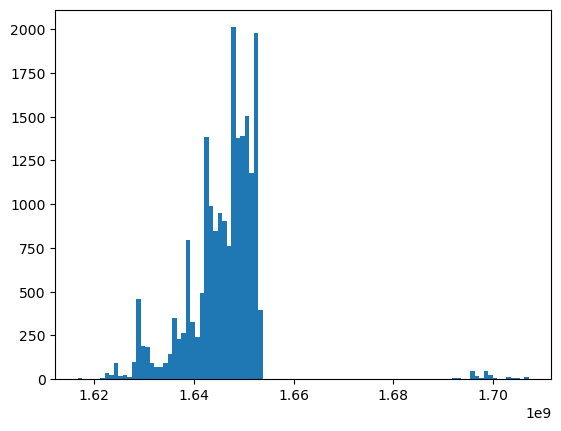

In [ ]:
plt.hist(eth_df['timeStamp'], bins=100);
print(max(eth_df['timeStamp']), min(eth_df['timeStamp']))

In [ ]:
eth_df.shape

(20188, 20)

In [ ]:
eth_df['dateTime'] = pd.to_datetime(eth_df['timeStamp'], unit='s')
eth_df.head()

,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,...,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,methodId,functionName,dateTime
0,19137267.0,1.706835e+09,0x6cf5ed1a19e0778c3d15b2ca6bdeb70f80e76d44a1d9...,61113.0,0x5c526aa4cf6dac588d1f514feeea90f37bce73b83e3b...,132.0,0xcd531ae9efcce479654c4926dec5f6209531ca7b,0x39e24af3f0c0a18b4f9f3d3c14940f2b62411a89,3096317680415402513543,90000.0,...,0.0,1.0,0x,,8638867.0,21000.0,42538.0,0x,,2024-02-02 00:50:47
1,19165256.0,1.707175e+09,0xcf23c520db302d5edd877984e46d054db546218cf913...,61574.0,0xdb8d0689e47a28602c383b1610e9afb4896bf5bfc0d1...,130.0,0xcd531ae9efcce479654c4926dec5f6209531ca7b,0x39e24af3f0c0a18b4f9f3d3c14940f2b62411a89,8248431152676167595150,90000.0,...,0.0,1.0,0x,,8734164.0,21000.0,14549.0,0x,,2024-02-05 23:13:11
2,19165258.0,1.707175e+09,0x54685182a4fdd43017b8b707084d307dd3941b05a7a6...,61575.0,0x3e4cbbeacd855609b2a2ed4be69aa22c1b7c83c18808...,122.0,0xcd531ae9efcce479654c4926dec5f6209531ca7b,0x39e24af3f0c0a18b4f9f3d3c14940f2b62411a89,5152113472260765081607,90000.0,...,0.0,1.0,0x,,8371078.0,21000.0,14547.0,0x,,2024-02-05 23:13:35
3,19165261.0,1.707175e+09,0x93668b95d7ea8ece47d65503c611cdde8f824c908fa5...,61577.0,0x8c697b4658f4a27f097443f5c9d0f1ba9d547555c076...,185.0,0xcd531ae9efcce479654c4926dec5f6209531ca7b,0x39e24af3f0c0a18b4f9f3d3c14940f2b62411a89,8248431152676167595150,90000.0,...,0.0,1.0,0x,,17125173.0,21000.0,14544.0,0x,,2024-02-05 23:14:11
4,19165263.0,1.707175e+09,0x2d29a80de68e40ea8ced8cb202f30d1396fc8e726c56...,61578.0,0x546654738e43ebb1f2cbeae54791be552a70c60e8b9d...,107.0,0xcd531ae9efcce479654c4926dec5f6209531ca7b,0x39e24af3f0c0a18b4f9f3d3c14940f2b62411a89,8248431152676167595150,90000.0,...,0.0,1.0,0x,,10807177.0,21000.0,14542.0,0x,,2024-02-05 23:14:35


(array([1.000e+01, 2.000e+00, 8.000e+00, 5.600e+01, 1.120e+02, 3.600e+01,
        5.520e+02, 3.780e+02, 1.620e+02, 1.620e+02, 4.980e+02, 4.960e+02,
        1.122e+03, 7.300e+02, 2.376e+03, 1.794e+03, 1.666e+03, 3.392e+03,
        2.896e+03, 3.158e+03, 3.940e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.000e+00,
        4.000e+00, 4.400e+01, 2.400e+01, 7.000e+01, 4.000e+00, 1.400e+01,
        8.000e+00, 1.200e+01]),
 array([18711.99791667, 18732.93732755, 18753.87673843, 18774.81614931,
        18795.75556019, 18816.69497106, 18837.63438194, 18858.57379282,
        18879.5132037 , 18900.45261458, 18921.39202546, 18942.33143634,
        18963.27084722, 18984.2102581 , 19005.14966898, 19026.08907986,
        19047.02849074, 19067.96790162, 19088.9073125 , 19109.84672338,
        19130.78

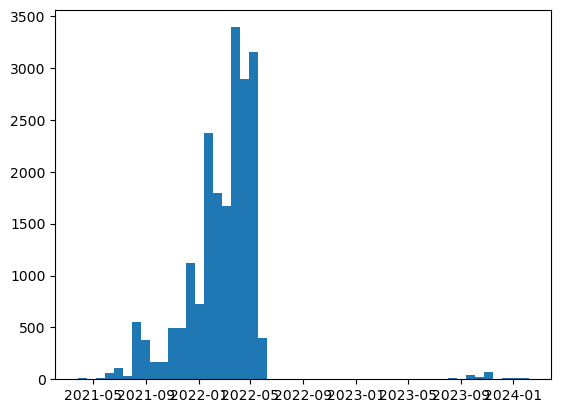

In [ ]:
plt.hist(eth_df['dateTime'], bins=50);

In [ ]:
eth_df['from'].value_counts()

pandas.core.series.Series

(array([328., 350., 136., 120., 136.,  98.,  54., 100., 146., 138., 126.,
        174., 154., 182., 178., 254., 360., 546., 318., 320., 376., 348.,
        248., 228.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

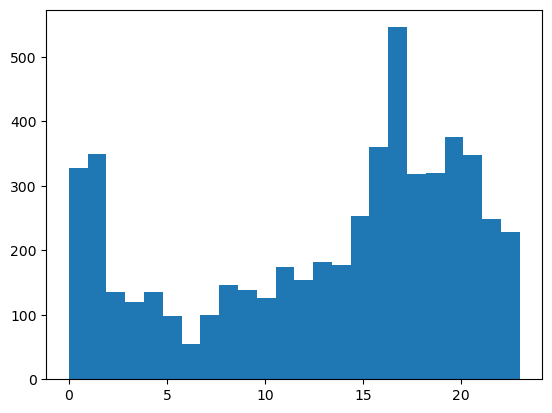

In [ ]:


plt.hist(eth_df.groupby('functionName').get_group('')['hours'], bins=24)

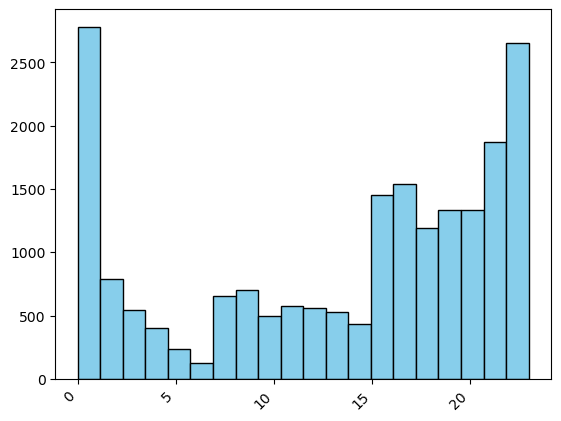

In [ ]:
eth_df['timeOnly'] = eth_df['dateTime'].dt.time
eth_df['hours'] = eth_df['timeOnly'].apply(lambda x: x.hour)
plt.hist(eth_df['hours'], bins=20, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right');


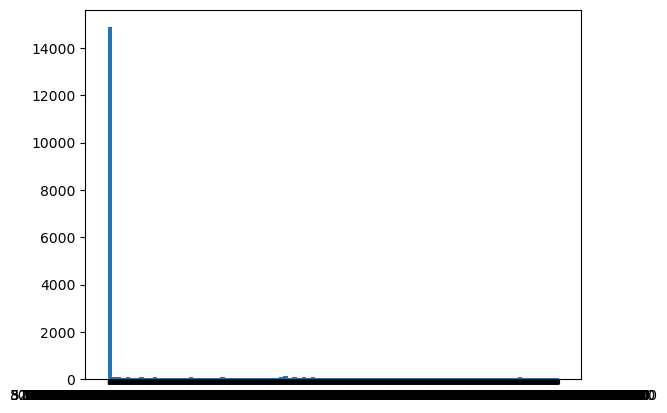

In [ ]:
plt.hist(eth_df['value'], bins = 100);



In [ ]:
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20188 entries, 0 to 20187
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   blockNumber        20188 non-null  float64
 1   timeStamp          20188 non-null  float64
 2   hash               20188 non-null  object 
 3   nonce              20188 non-null  float64
 4   blockHash          20188 non-null  object 
 5   transactionIndex   20188 non-null  float64
 6   from               20188 non-null  object 
 7   to                 20188 non-null  object 
 8   value              20188 non-null  object 
 9   gas                20188 non-null  float64
 10  gasPrice           20188 non-null  float64
 11  isError            20188 non-null  float64
 12  txreceipt_status   20188 non-null  float64
 13  input              20188 non-null  object 
 14  contractAddress    20188 non-null  object 
 15  cumulativeGasUsed  20188 non-null  float64
 16  gasUsed            201

In [124]:
eth_df.to_csv('../data/eth_trans_data.csv')